In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#hide
import pandas as pd
import numpy as np
import dask.array as da
from LDtools.liftover import *
from LDtools.genodata import *
from LDtools.sumstat import *
from LDtools.ldmatrix import *
from LDtools.utils import *

## 1.Bgen sumstat

In [3]:
ref_first_path ='/home/dmc2245/UKBiobank/results/REGENIE_results/results_imputed_data/2021_10_07_f3393_500K/100521_UKBB_Hearing_aid_f3393_expandedwhite_15601cases_237318ctrl_500k_PC1_PC2_f3393.regenie.snp_stats_original_columns.gz'
non_ref_first_path = '/home/dmc2245/UKBiobank/results/REGENIE_results/results_imputed_data/2021_10_07_f3393_500K/non_ref_first/100521_UKBB_Hearing_aid_f3393_expandedwhite_15601cases_237318ctrl_500k_PC1_PC2_f3393.regenie.snp_stats_original_columns.gz'

In [4]:
ref_sumstats = pd.read_csv(ref_first_path, compression='gzip', header=0, sep='\t', quotechar='"')

In [5]:
ref_sumstats

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,13259,rs562993331,G,A,0.000241,0.845090,252919,ADD,0.504461,0.395509,1.626830,0.694345,NaN
1,1,17569,rs535086049,C,A,0.000013,0.894182,252919,ADD,-1.191940,1.861180,0.410139,0.282414,NaN
2,1,17641,rs578081284,G,A,0.000792,0.852184,252919,ADD,-0.540352,0.278901,4.338100,1.428660,NaN
3,1,30741,rs558169846,C,A,0.000025,0.910708,252919,ADD,-1.310130,1.234800,1.125740,0.539574,NaN
4,1,52144,rs190291950,T,A,0.000485,0.803131,252919,ADD,0.050066,0.328259,0.023262,0.056121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21741016,22,51232581,rs5771020,T,C,0.297580,0.801918,252919,ADD,0.001958,0.014984,0.017084,0.047688,NaN
21741017,22,51236013,rs200507571,A,AT,0.252003,0.805509,252919,ADD,-0.006181,0.015737,0.154255,0.158326,NaN
21741018,22,51237063,rs3896457,T,C,0.298871,0.857844,252919,ADD,-0.008293,0.014447,0.329500,0.247219,NaN
21741019,22,51237215,rs536109858,C,T,0.000415,0.914087,252919,ADD,1.332660,0.205094,34.816600,8.440970,NaN


<AxesSubplot:>

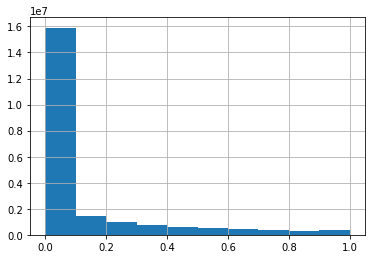

In [15]:
ref_sumstats.A1FREQ.hist()

In [11]:
non_sumstats = pd.read_csv(non_ref_first_path, compression='gzip', header=0, sep='\t', quotechar='"')

In [12]:
non_sumstats

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,13259,rs562993331,A,G,0.999759,0.845090,252919,ADD,-0.504461,0.395509,1.626830,0.694345,NaN
1,1,17569,rs535086049,A,C,0.999987,0.894182,252919,ADD,1.191940,1.861180,0.410139,0.282414,NaN
2,1,17641,rs578081284,A,G,0.999208,0.852184,252919,ADD,0.540352,0.278901,4.338100,1.428660,NaN
3,1,30741,rs558169846,A,C,0.999975,0.910708,252919,ADD,1.310130,1.234800,1.125740,0.539574,NaN
4,1,52144,rs190291950,A,T,0.999515,0.803131,252919,ADD,-0.050066,0.328259,0.023262,0.056121,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21741036,22,51232581,rs5771020,C,T,0.702420,0.801918,252919,ADD,-0.001958,0.014984,0.017084,0.047688,NaN
21741037,22,51236013,rs200507571,AT,A,0.747997,0.805509,252919,ADD,0.006181,0.015737,0.154255,0.158326,NaN
21741038,22,51237063,rs3896457,C,T,0.701129,0.857844,252919,ADD,0.008293,0.014447,0.329500,0.247219,NaN
21741039,22,51237215,rs536109858,T,C,0.999585,0.914087,252919,ADD,-1.332660,0.205094,34.816600,8.440970,NaN


<AxesSubplot:>

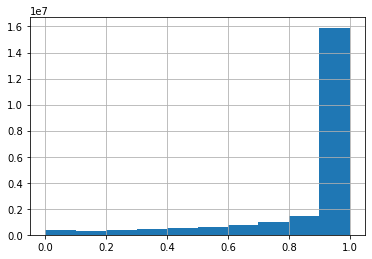

In [16]:
non_sumstats.A1FREQ.hist()

## 2.Exome sumstat

In [64]:
exome_path = '/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats_original_columns.gz'

In [65]:
exome_sumstats1 = pd.read_csv(exome_path, compression='gzip', header=0, sep='\t', quotechar='"')

In [66]:
exome_sumstats1

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD,-1.425140,1.279590,1.240420,0.576116,NaN
1,1,925881,chr1:925881:G:A,G,A,0.004690,100210,ADD,-0.236930,0.142267,2.773530,1.018480,NaN
2,1,925885,chr1:925885:C:T,C,T,0.000035,100877,ADD,-1.065500,2.232200,0.227847,0.198511,NaN
3,1,925908,chr1:925908:G:GGCTCT,G,GGCTCT,0.000034,102862,ADD,1.601750,1.651090,0.941126,0.478877,NaN
4,1,925915,chr1:925915:C:T,C,T,0.000049,102986,ADD,0.865111,1.417950,0.372240,0.266172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029148,22,50782235,chr22:50782235:G:A,G,A,0.000088,102704,ADD,-0.047169,1.037140,0.002068,0.016047,NaN
3029149,22,50782243,chr22:50782243:C:T,C,T,0.001075,102752,ADD,-0.370907,0.289747,1.638670,0.697869,NaN
3029150,22,50782271,chr22:50782271:C:T,C,T,0.000127,102763,ADD,-1.107710,1.056710,1.098860,0.530889,NaN
3029151,22,50782306,chr22:50782306:T:C,T,C,0.007670,93607,ADD,-0.065070,0.119555,0.296226,0.231911,NaN


<AxesSubplot:>

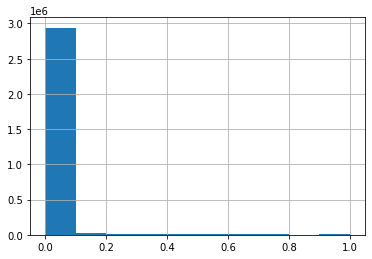

In [67]:
exome_sumstats1.A1FREQ.hist()

In [68]:
exome_sumstats1[exome_sumstats1.A1FREQ>0.5]

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
73,1,931131,chr1:931131:C:CCCCT,C,CCCCT,0.760097,101022,ADD,-0.003684,0.023232,0.025142,0.058482,NaN
111,1,935954,chr1:935954:G:T,G,T,0.718850,102938,ADD,0.006622,0.021419,0.095571,0.120783,NaN
165,1,941119,chr1:941119:A:G,A,G,0.945537,102997,ADD,-0.023266,0.042291,0.302660,0.234913,NaN
213,1,942451,chr1:942451:T:C,T,C,0.999922,102987,ADD,-1.490850,1.154600,1.667260,0.706359,NaN
412,1,944296,chr1:944296:G:A,G,A,0.945461,103036,ADD,-0.020273,0.042374,0.228904,0.199051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028490,22,50679152,chr22:50679152:T:C,T,C,0.515077,103036,ADD,0.005260,0.019236,0.074766,0.105396,NaN
3028569,22,50695090,chr22:50695090:G:A,G,A,0.571927,96695,ADD,0.028791,0.020166,2.038300,0.814227,NaN
3028607,22,50698821,chr22:50698821:T:C,T,C,0.799912,102972,ADD,-0.034273,0.024064,2.028530,0.811438,NaN
3029005,22,50744057,chr22:50744057:A:G,A,G,0.730827,93180,ADD,0.024418,0.021401,1.301860,0.595381,NaN


Some SNPs' A1freq is more than 0.5

## 3.Genodata

In [18]:
lf = Liftover('hg38','hg19')

In [22]:
[lf.chrpos_liftover(5,i) for i in [329201,698951]]

[(5, 329316), (5, 699066)]

In [28]:
imp_geno_path = 'MWE_region_extraction/ukb_imp_chr5_v3_05_272856_1213643.bgen'
bgen_sample_path = 'MWE_region_extraction/ukb_imp_chr5_v3_05_272856_1213643.sample'
imput_geno = Genodata(imp_geno_path,bgen_sample_path)

In [29]:
imput_geno.extractbyregion([5,329316-10,699066+10])

In [30]:
imput_geno

bim:       chrom              snp   cm     pos a0 a1      i
2292       5  chr5:329316:T:C  0.0  329316  T  C   2292
2293       5  chr5:329363:G:C  0.0  329363  G  C   2293
2294       5  chr5:329485:A:C  0.0  329485  A  C   2294
2295       5  chr5:329527:T:C  0.0  329527  T  C   2295
2296       5  chr5:329538:C:T  0.0  329538  C  T   2296
...      ...              ...  ...     ... .. ..    ...
17145      5  chr5:699036:G:A  0.0  699036  G  A  17145
17146      5  chr5:699046:A:G  0.0  699046  A  G  17146
17147      5  chr5:699064:A:G  0.0  699064  A  G  17147
17148      5  chr5:699066:T:C  0.0  699066  T  C  17148
17149      5  chr5:699067:T:G  0.0  699067  T  G  17149

[14858 rows x 7 columns] 
 fam:            fid      iid  missing  sex
0       5414209  5414209        0    1
1       5296052  5296052        0    2
2       4852763  4852763        0    2
3       5230840  5230840        0    2
4       1992219  1992219        0    2
...         ...      ...      ...  ...
487404  2103374  21

In [38]:
imput_geno.bim = pd.concat([imput_geno.bim[:5],imput_geno.bim[-5:]])
imput_geno.bed = da.concatenate([imput_geno.bed[:5,:],imput_geno.bed[-5:,:]])

In [40]:
gn = imput_geno.bed.compute()

In [59]:
def a1freq(d):
    a1,tol = 0.0,0.0
    try:
        a1 = d[2]*2
        tol = d[2]*2
    except:
        print('no 2')
    try:
        a1 += d[1]
        tol += d[1]*2
    except:
        print('no 1')
    try:
        tol += d[0]*2
    except:
        print('no 0')
    return a1/tol

In [60]:
bim = imput_geno.bim.copy()
bim['A1freq'] = [a1freq(pd.Series(gn[i,:]).value_counts()) for i in range(10)]

no 2
no 2
no 2
no 2
no 2
no 2


In [61]:
bim

,chrom,snp,cm,pos,a0,a1,i,A1freq
2292,5,chr5:329316:T:C,0.0,329316,T,C,2292,0.001274
2293,5,chr5:329363:G:C,0.0,329363,G,C,2293,0.000038
2294,5,chr5:329485:A:C,0.0,329485,A,C,2294,0.000025
2295,5,chr5:329527:T:C,0.0,329527,T,C,2295,0.009335
2296,5,chr5:329538:C:T,0.0,329538,C,T,2296,0.000630
17145,5,chr5:699036:G:A,0.0,699036,G,A,17145,0.732060
17146,5,chr5:699046:A:G,0.0,699046,A,G,17146,0.725706
17147,5,chr5:699064:A:G,0.0,699064,A,G,17147,0.000262
17148,5,chr5:699066:T:C,0.0,699066,T,C,17148,0.000267
17149,5,chr5:699067:T:G,0.0,699067,T,G,17149,0.000007


In [44]:
region = [5,329316-10,699066+10]
sub_ref_sumstat = ref_sumstats[(ref_sumstats.CHROM == region[0]) & (ref_sumstats.GENPOS >= region[1]) & (ref_sumstats.GENPOS <= region[2])]

In [45]:
sub_ref_sumstat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
6768252,5,329316,rs190199516,T,C,0.001075,0.859074,252919,ADD,1.361040,0.133031,85.408700,19.615000,NaN
6768253,5,329527,rs57074855,T,C,0.001888,0.968515,252919,ADD,0.133344,0.143781,0.860093,0.451349,NaN
6768254,5,329796,rs189083301,T,G,0.000624,0.911649,252919,ADD,-0.230091,0.275391,0.698071,0.394229,NaN
6768255,5,330557,rs62330032,T,C,0.057675,0.995036,252919,ADD,-0.057468,0.026912,4.617460,1.499650,NaN
6768256,5,330591,rs6882831,C,T,0.001888,0.968976,252919,ADD,0.131938,0.143741,0.842521,0.445297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771728,5,698433,rs56298737,A,G,0.187500,0.939798,252919,ADD,0.030700,0.016170,3.604800,1.239480,NaN
6771729,5,698829,rs148685168,G,A,0.015867,0.843669,252919,ADD,-0.067617,0.054306,1.550310,0.671438,NaN
6771730,5,699036,rs440225,G,A,0.722938,0.821137,252919,ADD,0.000175,0.015112,0.000134,0.004034,NaN
6771731,5,699046,rs434215,A,G,0.722452,0.820904,252919,ADD,0.000256,0.015107,0.000287,0.005906,NaN


## Comparing exome and imput geno

In [49]:
region = [5,272755,306748]
geno_path = 'MWE_region_extraction/ukb23156_c5.merged.filtered.5_272741_1213528.bed'
sumstats_path = 'MWE_region_extraction/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats'

In [50]:
exome_sumstats = Sumstat(sumstats_path)
exome_geno = Genodata(geno_path)
exome_sumstats.extractbyregion(region)
exome_geno.geno_in_stat(exome_sumstats.ss)

In [51]:
exome_geno

bim:    chrom              snp   cm     pos a0 a1    i
4       5  chr5:272755:A:G  0.0  272755  G  A    4
5       5  chr5:272758:A:G  0.0  272758  G  A    5
7       5  chr5:272771:C:G  0.0  272771  G  C    7
10      5  chr5:272791:A:C  0.0  272791  C  A   10
17      5  chr5:272816:C:T  0.0  272816  T  C   17
..    ...              ...  ...     ... .. ..  ...
394     5  chr5:306692:G:A  0.0  306692  A  G  394
397     5  chr5:306695:C:T  0.0  306695  T  C  397
402     5  chr5:306703:C:T  0.0  306703  T  C  402
408     5  chr5:306732:C:T  0.0  306732  T  C  408
414     5  chr5:306748:C:T  0.0  306748  T  C  414

[96 rows x 7 columns] 
 fam:            fid      iid father mother gender trait       i
0       1434748  1434748      0      0      0    -9       0
1       5523981  5523981      0      0      0    -9       1
2       5023838  5023838      0      0      0    -9       2
3       4023729  4023729      0      0      0    -9       3
4       4442146  4442146      0      0      0    -9    

In [53]:
eg = exome_geno.bed[[1,-1],:].compute()

In [62]:
[a1freq(pd.Series(eg[i,:]).value_counts()) for i in range(2)]

no 0
no 0


[0.999962616449759, 0.9997458171977094]

In [63]:
[pd.Series(eg[i,:]).value_counts() for i in range(2)]

[2.0    200608
 1.0        15
 dtype: int64,
 2.0    200541
 1.0       102
 dtype: int64]

In [69]:
exome_sumstats1[(exome_sumstats1.CHROM == region[0]) & (exome_sumstats1.GENPOS >= region[1]) & (exome_sumstats1.GENPOS <= region[2])]

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
811356,5,272755,chr5:272755:A:G,A,G,0.000578,103030,ADD,1.708990,0.242533,41.255400,9.874250,NaN
811357,5,272758,chr5:272758:A:G,A,G,0.000024,103031,ADD,-1.285990,1.782120,0.520716,0.327407,NaN
811358,5,272771,chr5:272771:C:G,C,G,0.000175,103010,ADD,1.620460,0.466804,9.589730,2.708480,NaN
811359,5,272791,chr5:272791:A:C,A,C,0.012645,94857,ADD,0.014049,0.071979,0.038098,0.073017,NaN
811360,5,272816,chr5:272816:C:T,C,T,0.001325,100366,ADD,-0.259206,0.276487,0.878906,0.457795,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811447,5,306692,chr5:306692:G:A,G,A,0.000524,103037,ADD,0.974559,0.321401,7.684350,2.254130,NaN
811448,5,306695,chr5:306695:C:T,C,T,0.000063,103036,ADD,-1.051520,1.797830,0.342088,0.252878,NaN
811449,5,306703,chr5:306703:C:T,C,T,0.000073,103037,ADD,0.645902,1.310650,0.242862,0.206107,NaN
811450,5,306732,chr5:306732:C:T,C,T,0.000019,103037,ADD,-1.033180,3.113500,0.110117,0.130762,NaN
